# Modelování a předpovídání vývoje koncentrace biomasy při vsádkové kultivaci

Tento projekt využívá data z http://www.industrialpenicillinsimulation.com/. Data byla generována pomocí pokročilé počítačové simulace 100 000 litrového bioreaktoru, kde probíhala fermentace za vzniku penicillinu. Simulace se nazývá IndPenSim. Autoři projektu: 

    'IndPenSim is the first simulation to include a realistic simulated Raman spectroscopy device for the purpose 
    of developing, evaluating and implementation of advanced and innovative control solutions applicable to 
    biotechnology facilities.'
    
Data obsahují 100 vsádek, pro účely tohoto projektu bylo využíváno prvních 30. Jedná se totiž o vsádky s co nejmenšími zásahy do průběhu.

# Příprava dat

Z celého datasetu je potřeba vytvořit tabulku s údaji o času a koncentraci biomasy. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
%%capture
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
data_total = pd.read_csv(r"C:\Users\klime\Downloads\100_Batches_IndPenSim\Mendeley_data\100_Batches_IndPenSim_V3.csv")

In [5]:
data_total

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,210,209,208,207,206,205,204,203,202,201
0,0.2,30,100,8,0.0000,30.1180,9.8335,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.4,30,100,8,0.0000,51.2210,18.1550,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,0.6,30,100,8,0.0000,54.3020,9.5982,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,0.8,30,100,8,0.0000,37.8160,4.3395,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1.0,30,100,8,0.5181,18.9080,1.1045,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113930,229.2,65,100,80,0.0000,12.9000,33.5860,5.93590,250,0.9,...,816050.0,823390.0,830160.0,835530.0,839140.0,840570.0,840160.0,838580.0,NaN,NaN
113931,229.4,65,100,80,0.0000,10.0470,10.0760,98.83400,250,0.9,...,773520.0,780840.0,787470.0,792750.0,796220.0,797610.0,797270.0,796020.0,NaN,NaN
113932,229.6,65,100,80,0.0000,7.3609,69.3450,9.88340,250,0.9,...,788240.0,795550.0,802190.0,807420.0,810590.0,811660.0,811210.0,809960.0,NaN,NaN
113933,229.8,65,100,80,0.0000,6.2794,38.6100,0.98834,250,0.9,...,781180.0,788420.0,794950.0,800140.0,803610.0,804900.0,804490.0,803410.0,NaN,NaN


In [6]:
bm = data_total[['Time (h)','Offline Biomass concentratio(X_offline:X(g L^{-1}))', '2-PAT control(PAT_ref:PAT ref)']]
bm['Days']=data_total['Time (h)']/24
bm=bm[bm['Offline Biomass concentratio(X_offline:X(g L^{-1}))'].notna()] ##keeping only not NaN values
bm.tail()

C:\Users\klime\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Time (h),Offline Biomass concentratio(X_offline:X(g L^{-1})),2-PAT control(PAT_ref:PAT ref),Days
113744,192.0,19.643,100,8.000000
113804,204.0,18.869,100,8.500000
113864,216.0,17.921,100,9.000000
113924,228.0,17.006,100,9.500000
113934,230.0,16.863,100,9.583333


In [7]:
bm2 = bm[['Days', '2-PAT control(PAT_ref:PAT ref)','Offline Biomass concentratio(X_offline:X(g L^{-1}))']]
bm2

,Days,2-PAT control(PAT_ref:PAT ref),Offline Biomass concentratio(X_offline:X(g L^{-1}))
4,0.041667,1,0.52808
59,0.500000,1,2.89740
119,1.000000,1,8.52330
179,1.500000,1,12.16400
239,2.000000,1,15.30600
...,...,...,...
113744,8.000000,100,19.64300
113804,8.500000,100,18.86900
113864,9.000000,100,17.92100
113924,9.500000,100,17.00600


In [8]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from scipy.ndimage.interpolation import shift
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.api import tsa
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from pandas import DataFrame

In [9]:
gr =bm2.groupby('2-PAT control(PAT_ref:PAT ref)')
batch_1=gr.get_group(1)

In [10]:
data_1=batch_1[['Days', 'Offline Biomass concentratio(X_offline:X(g L^{-1}))']]
data_1.set_index('Days', inplace = True)
data_1.head()

,Offline Biomass concentratio(X_offline:X(g L^{-1}))
Days,
0.041667,0.52808
0.500000,2.89740
1.000000,8.52330
1.500000,12.16400
2.000000,15.30600


# Explorační analýza dat

Klouzavý průměr:

<Figure size 1152x216 with 0 Axes>

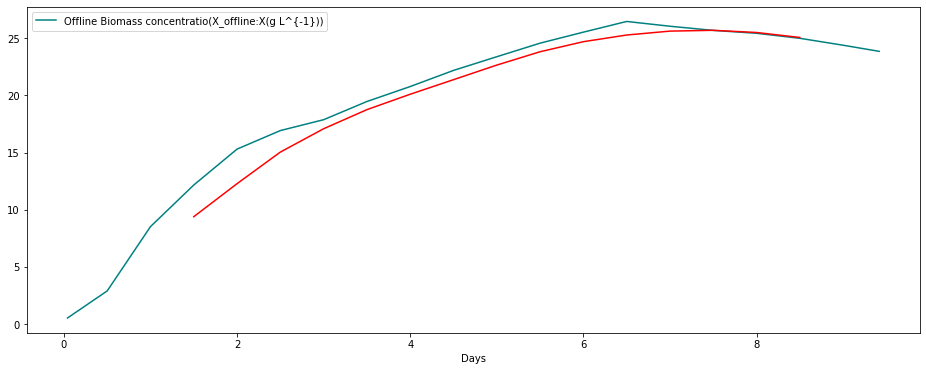

In [11]:
rolling_mean = data_1.rolling(window=6, center=True).mean() 
plt.figure(figsize=(16,3))
data_1.plot(y='Offline Biomass concentratio(X_offline:X(g L^{-1}))', color='teal', figsize=(16,6))
plt.plot(rolling_mean, color='red')

Graf autokorelační funkce.V ARIMA modelu se počet výzmnamných autokorelačních faktorů používá k odhadu stupně klouzavého průměru. 

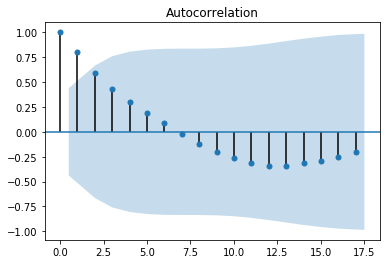

In [12]:
sm.graphics.tsa.plot_acf(data_1.values.squeeze(), lags=17)
plt.show()

Graf parciální autokorelační funkce. V ARIMA modelu se počet výzmnamných parciálně autokorelovaných faktorů používá k odhadu stupně autoregresního koeficientu. Zajímavé jsou poslední dva faktory (13. a 14.) o kterých se dá také tvrdit, že jsou korelovány s hodnotou koncentrace biomasy v čase t, ale vzhledem k tomu že u ostaních kultivací se tento fenomén nepotvrdil, to asi nejde brát na zřetel.

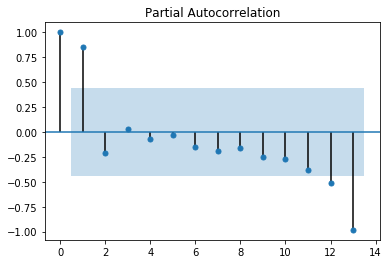

In [13]:
sm.graphics.tsa.plot_pacf(data_1.values.squeeze(), lags=13) ##od 14 to hazi chybu
plt.show()

Před vytvořením predikčního modelu trénujeme ARIMA model daty z první kultivace a zhodnotíme rozložení chyb.

C:\Users\klime\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\klime\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                               ARIMA Model Results                                               
Dep. Variable:     D.Offline Biomass concentratio(X_offline:X(g L^{-1}))   No. Observations:                   19
Model:                                                    ARIMA(5, 1, 0)   Log Likelihood                 -25.988
Method:                                                          css-mle   S.D. of innovations              0.900
Date:                                                   Mon, 31 Aug 2020   AIC                             65.976
Time:                                                           08:46:48   BIC                             72.587
Sample:                                                                1   HQIC                            67.095
                                                                                                                 
                                                                  coef    std err       

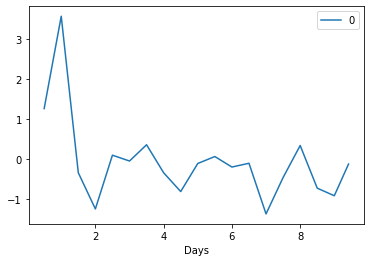

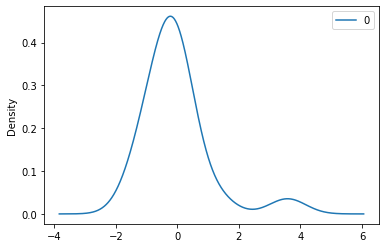

               0
count  19.000000
mean   -0.051927
std     1.068836
min    -1.365595
25%    -0.587870
50%    -0.117693
75%     0.087252
max     3.581050


In [14]:
# fit model
model = ARIMA(data_1, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

Graf rozložení chyb ukazuje, že v datech je ještě nějaký trend, nezachycený modelem. Dále, z grafu hustoty rozložení chyb vyplývá, že tyto chyby mají normální rozdělení, ale nemají průměr v 0, model tedy není objektivní.

#  Klouzavá predikce pomocí ARIMA modelu


Nyní se dostáváme k samotné predikci pomocí ARIMA modelu (zkratka anglického AutoRegressive Integrated Moving Average, „autoregresní integrovaný klouzavý průměr“). Rozdělíme data s příslušné vsádky na trénovací a testovací část a vytvoříme predikci pro každý element testovacího setu.

Konkrétně se jedná o klouzavou predikci, kdy je každý nový bod předpovědi počítán z předešlých originálních dat (oproti tomu kdyby se další vývoj počítal jenom z predikcí samotných).

Nastavují se parametry (p, d, q), kde p určuje stupeň parciální autokorelačního koeficientu, d stupeň integrace, q stupeň klouzavého průměru (autokorelačního koeficientu).

predicted=22.123792, expected=20.781000
predicted=22.763895, expected=22.192000
predicted=24.150231, expected=23.390000
predicted=25.112292, expected=24.576000
predicted=26.229369, expected=25.540000
predicted=26.984687, expected=26.475000
predicted=27.843392, expected=26.058000
predicted=26.461964, expected=25.693000
predicted=25.934543, expected=25.440000
predicted=25.635987, expected=25.002000
predicted=24.984472, expected=24.397000
predicted=24.171404, expected=23.860000
Test MSE: 0.717


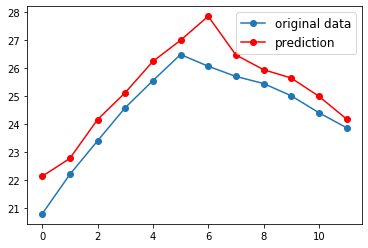

In [15]:
X = data_1.values
size = int(len(X) * 0.4)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test, '-o', label = 'original data')
#plt.plot(data_1, '-o', label = 'original data')
plt.plot(predictions, '-o',label = 'prediction', color='red')
plt.legend(fontsize=12)
plt.show()

Na příkladu vidíme predikované a originální data pro každou iteraci. Je také spočítána mean squared error (MSE) pro možnost porovnání jednotlivých předpovědí. 

Je vytvořen graf, kde jsou reálná data (modře) porovnaná s klouzavou predikcí (červeně). Vidíme že model si vedl slušně až na zlom po skončení exponenciální fáze. To je částečně asi zapříčiněno i tím, že vzhledem k nedostatečné velikosti dat, se nedá nastavit parametr q ovlivňující stupeň klouzavého průměru (v tomto případě musí být 0, jinak model hází chybu).Což je škoda, protože jak jsme viděli, klouzavý průměr poměrně dobře "chytá" konec exponenciální fáze. Zatímco tady z grafu ARIMA modelu je patrné, že model reaguje na konec exponenciální fáze až zpětně.  

# Automatizování procesu analýzy (vytvoření funkce)

In [16]:
def prediction(batch):
    #data handling
    b=gr.get_group(batch)                             
    data_x=b[['Days', 'Offline Biomass concentratio(X_offline:X(g L^{-1}))']]
    data_x.set_index('Days', inplace = True)
    
    #plotting 
    #rollin mean
    rolling_mean = data_x.rolling(window=6, center=True).mean() 
    data_x.plot(y='Offline Biomass concentratio(X_offline:X(g L^{-1}))', color='teal', figsize=(6,4))
    plt.plot(rolling_mean, color='red', label= 'rolling mean')
    plt.ylabel('Biomass conc. (g L^{-1})')
    plt.legend()
    plt.show()
    
    #autocorrelation
    sm.graphics.tsa.plot_acf(data_x.values.squeeze(), lags=17)
    plt.show()

    #Partial autocorrelation
    sm.graphics.tsa.plot_pacf(data_x.values.squeeze(), lags=13) ##od 14 to hazi chybu
    plt.show()
    
    #prediction
    X = data_x.values
    size = int(len(X) * 0.4)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(2,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
    # plot
    plt.plot(test, '-o', label = 'original data')
    plt.plot(predictions, '-o',label = 'prediction', color='red')
    plt.ylabel('Biomass conc. (g L^{-1})')
    plt.legend(fontsize=12)
    plt.show()
    

Funkce je aplikována na v pořadí 4. kultivaci. 

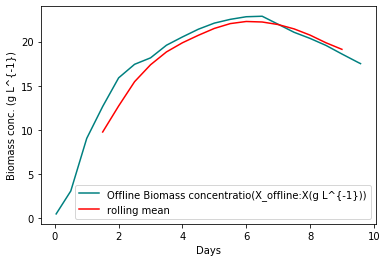

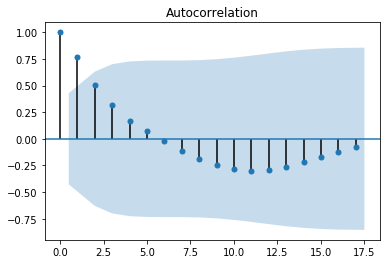

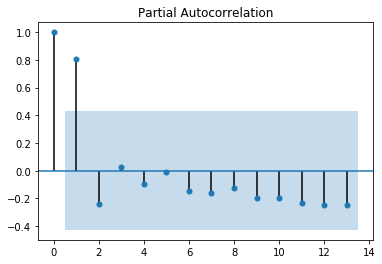

predicted=22.092140, expected=20.520000
predicted=22.251233, expected=21.397000
predicted=22.928530, expected=22.086000
predicted=23.370233, expected=22.512000
predicted=23.511897, expected=22.808000
predicted=23.601345, expected=22.864000
predicted=23.405348, expected=21.957000
predicted=21.753436, expected=21.048000
predicted=20.537953, expected=20.356000
predicted=19.938525, expected=19.562000
predicted=19.084076, expected=18.590000
predicted=17.932787, expected=17.650000
predicted=16.932645, expected=17.502000
Test MSE: 0.700


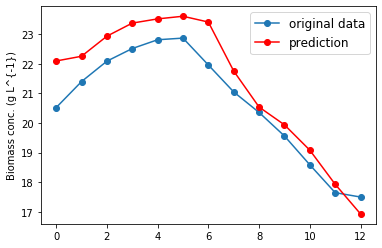

In [17]:
prediction(4)

In [18]:
tg = bm2.loc[(bm2['2-PAT control(PAT_ref:PAT ref)']<6)]
grouped_data=tg[['Days', 'Offline Biomass concentratio(X_offline:X(g L^{-1}))']]
grouped_data.set_index('Days', inplace = True)
grouped_data.head()


,Offline Biomass concentratio(X_offline:X(g L^{-1}))
Days,
0.041667,0.52808
0.500000,2.89740
1.000000,8.52330
1.500000,12.16400
2.000000,15.30600


# Optimalizování parametrů modelu ARIMA (při zkombinování datasetů)

Jelikož data z jednotlivých kultivací nejsou dostatečná pro zařazení autokorelačního (ACF koeficientu), čistě pro vyzkoušení jsem tedy vytvořil funkci pro spojení dat ze tří kultivací. Sice se tím stírá smysl modelu pro předpovídání trendů jednotlivých kultivací, ale pro vyzkoušení chování modelu ARIMA při nenulovém autokorelačním koeficientu to stačí. 

In [19]:
from matplotlib.pyplot import figure
import warnings

Optimální parametry p, d, q jsou hledány pomocí "Grid search", funkce která porovná hodnoty MSE pro všechny kombinace parametrů v daném rozmezí a vybere nejlepší.

In [20]:
p_values = [0, 1, 2, 3]
d_values = [0, 1, 2, 3]
q_values = [0, 1, 2, 3]

In [23]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:len(X)]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(number, p_values, d_values, q_values):
    tg = bm2.loc[(bm2['2-PAT control(PAT_ref:PAT ref)']<(number+4))&(bm2['2-PAT control(PAT_ref:PAT ref)']>number)]
    grouped_data=tg[['Days', 'Offline Biomass concentratio(X_offline:X(g L^{-1}))']]
    grouped_data.set_index('Days', inplace = True)
    dataset = grouped_data.values
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 #evaluate parameters
    warnings.filterwarnings("ignore")
#evaluate_models(5, p_values, d_values, q_values)

In [22]:
evaluate_models(11, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=49.748
ARIMA(0, 0, 1) MSE=27.507
ARIMA(0, 0, 2) MSE=24.152
ARIMA(0, 0, 3) MSE=22.575
ARIMA(0, 1, 0) MSE=26.168
ARIMA(0, 1, 1) MSE=26.749
ARIMA(0, 1, 2) MSE=26.602
ARIMA(0, 1, 3) MSE=26.782
ARIMA(0, 2, 0) MSE=49.900
ARIMA(0, 2, 1) MSE=28.702
ARIMA(0, 2, 2) MSE=29.765
ARIMA(0, 2, 3) MSE=30.273
ARIMA(1, 0, 0) MSE=23.084
ARIMA(1, 0, 1) MSE=22.460
ARIMA(1, 0, 2) MSE=22.572
ARIMA(1, 0, 3) MSE=22.564
ARIMA(1, 1, 0) MSE=26.646
ARIMA(1, 1, 1) MSE=25.304
ARIMA(1, 1, 2) MSE=24.785
ARIMA(1, 1, 3) MSE=24.895
ARIMA(1, 2, 0) MSE=48.685
ARIMA(1, 2, 2) MSE=28.363
ARIMA(2, 0, 0) MSE=22.497
ARIMA(2, 0, 1) MSE=20.193
ARIMA(2, 0, 2) MSE=20.303
ARIMA(2, 1, 0) MSE=26.611
ARIMA(2, 1, 1) MSE=24.756
ARIMA(2, 2, 0) MSE=43.554
ARIMA(3, 0, 0) MSE=22.682
ARIMA(3, 0, 1) MSE=22.293
ARIMA(3, 0, 2) MSE=19.426
ARIMA(3, 0, 3) MSE=19.681
ARIMA(3, 1, 0) MSE=26.834
ARIMA(3, 1, 1) MSE=24.936
ARIMA(3, 1, 2) MSE=24.553
ARIMA(3, 2, 0) MSE=41.087
ARIMA(3, 2, 1) MSE=31.124
Best ARIMA(3, 0, 2) MSE=19.426


In [312]:
evaluate_models(13, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=50.396
ARIMA(0, 0, 1) MSE=32.437
ARIMA(0, 0, 2) MSE=30.679
ARIMA(0, 0, 3) MSE=29.127
ARIMA(0, 1, 0) MSE=34.339
ARIMA(0, 1, 1) MSE=35.925
ARIMA(0, 1, 2) MSE=36.017
ARIMA(0, 1, 3) MSE=36.604
ARIMA(0, 2, 0) MSE=67.512
ARIMA(0, 2, 1) MSE=37.228
ARIMA(0, 2, 2) MSE=39.855
ARIMA(0, 2, 3) MSE=41.038
ARIMA(1, 0, 0) MSE=30.162
ARIMA(1, 0, 1) MSE=30.169
ARIMA(1, 0, 2) MSE=30.337
ARIMA(1, 0, 3) MSE=30.188
ARIMA(1, 1, 0) MSE=35.634
ARIMA(1, 1, 1) MSE=32.439
ARIMA(1, 1, 2) MSE=32.789
ARIMA(1, 1, 3) MSE=32.936
ARIMA(1, 2, 0) MSE=66.781
ARIMA(1, 2, 2) MSE=37.564
ARIMA(2, 0, 0) MSE=30.267
ARIMA(2, 0, 1) MSE=27.853
ARIMA(2, 0, 2) MSE=29.029
ARIMA(2, 1, 0) MSE=36.027
ARIMA(2, 1, 1) MSE=32.667
ARIMA(2, 1, 3) MSE=33.041
ARIMA(2, 2, 0) MSE=60.799
ARIMA(3, 0, 0) MSE=30.664
ARIMA(3, 0, 1) MSE=30.159
ARIMA(3, 0, 2) MSE=27.214
ARIMA(3, 0, 3) MSE=28.927
ARIMA(3, 1, 0) MSE=36.641
ARIMA(3, 1, 1) MSE=33.019
ARIMA(3, 1, 2) MSE=32.994
ARIMA(3, 2, 0) MSE=58.569
ARIMA(3, 2, 1) MSE=42.665
Best ARIMA(3

In [313]:
evaluate_models(15, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=47.460
ARIMA(0, 0, 1) MSE=27.206
ARIMA(0, 0, 2) MSE=24.553
ARIMA(0, 0, 3) MSE=23.419
ARIMA(0, 1, 0) MSE=28.705
ARIMA(0, 1, 1) MSE=29.174
ARIMA(0, 1, 2) MSE=29.404
ARIMA(0, 1, 3) MSE=29.802
ARIMA(0, 2, 0) MSE=53.098
ARIMA(0, 2, 1) MSE=31.101
ARIMA(0, 2, 2) MSE=32.219
ARIMA(0, 2, 3) MSE=33.275
ARIMA(1, 0, 0) MSE=24.921
ARIMA(1, 0, 1) MSE=23.971
ARIMA(1, 0, 2) MSE=24.157
ARIMA(1, 0, 3) MSE=24.071
ARIMA(1, 1, 0) MSE=29.120
ARIMA(1, 1, 1) MSE=27.761
ARIMA(1, 1, 2) MSE=26.927
ARIMA(1, 1, 3) MSE=27.131
ARIMA(1, 2, 0) MSE=52.850
ARIMA(1, 2, 2) MSE=29.895
ARIMA(2, 0, 0) MSE=23.927
ARIMA(2, 0, 1) MSE=21.105
ARIMA(2, 0, 2) MSE=21.342
ARIMA(2, 1, 0) MSE=29.437
ARIMA(2, 1, 1) MSE=26.804
ARIMA(2, 1, 3) MSE=26.722
ARIMA(2, 2, 0) MSE=47.692
ARIMA(3, 0, 0) MSE=24.245
ARIMA(3, 0, 1) MSE=22.767
ARIMA(3, 0, 2) MSE=20.248
ARIMA(3, 0, 3) MSE=20.629
ARIMA(3, 1, 0) MSE=29.866
ARIMA(3, 1, 1) MSE=27.121
ARIMA(3, 1, 2) MSE=26.612
ARIMA(3, 2, 0) MSE=45.691
ARIMA(3, 2, 1) MSE=34.497
Best ARIMA(3

Z grid search vyšlo pro vybrané datasety vždy optimální nastavení parametrů (3, 0, 2). Po zanesení tohoto modelu do grafu (společně s modely s parametry (3,1,2) a (2, 0, 2)) se ukázalo, že někdy dosahovali nižší hodnoty MSE jiné modely než právě (3, 0, 2). Čím to bylo způsobené se mi nepodařilo zjistit. Nicméně platí, že hodnota MSE je silně ovlivněná i tím, že dataset je "slepený" z více kusů. Nepodceňoval bych tedy ani vizuální zhodnocení, z tohoto hlediska mě zaujalo nastavení parametrů (3,1,1). Sice se zdá že trochu podhodnocuje ke konci exponenciální fáze, ale zase poté dobře kopíruje stacionární fázi. Na grafech je také pro porovnání počáteční nastavení parametrů (2,1,0), tedy s nulovým řádem klouzavého průměru. 

In [41]:
def multi_model_chart2(number):
    tg = bm2.loc[(bm2['2-PAT control(PAT_ref:PAT ref)']<(number+4))&(bm2['2-PAT control(PAT_ref:PAT ref)']>number)]
    grouped_data=tg[['Days', 'Offline Biomass concentratio(X_offline:X(g L^{-1}))']]
    grouped_data.set_index('Days', inplace = True)
    X = grouped_data.values
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train] 
    
    predictions1 = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(3,0,2))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions1.append(yhat)
        obs = test[t]
        history.append(obs)
    error1 = mean_squared_error(test, predictions1)
    print('Test MSE (3,0,2): %.3f' % error1)
    predictions2 = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(2,1,0))
        model_fit = model.fit(disp=1)
        output = model_fit.forecast()
        yhat = output[0]
        predictions2.append(yhat)
        obs = test[t]
        history.append(obs)
    error2 = mean_squared_error(test, predictions2)
    print('Test MSE (2,1,0): %.3f' % error2)
    predictions3 = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(3,1,1))
        model_fit = model.fit(disp=1)
        output = model_fit.forecast()
        yhat = output[0]
        predictions3.append(yhat)
        obs = test[t]
        history.append(obs)
    error3 = mean_squared_error(test, predictions3)
    print('Test MSE (3,1,1): %.3f' % error3)
    # plot
    plt.figure(figsize=(16,9))
    plt.plot(test, '-o', label = 'original data', color='red')
    plt.plot(predictions1, ':o',label = '(3,0,2)', color='blue')
    plt.plot(predictions2, ':o',label = '(2,1,0)', color='green')
    plt.plot(predictions3, ':o',label = '(3,1,1)', color='yellow')
    #plt.plot(predictions4, ':o',label = '(3,1,2)', color='orange')
    plt.legend(fontsize=12)
    plt.ylabel('Biomass conc. (g L^{-1})')
    plt.show()
    warnings.filterwarnings("ignore")

Test MSE (3,0,2): 11.899
Test MSE (2,1,0): 14.089
Test MSE (3,1,1): 12.215


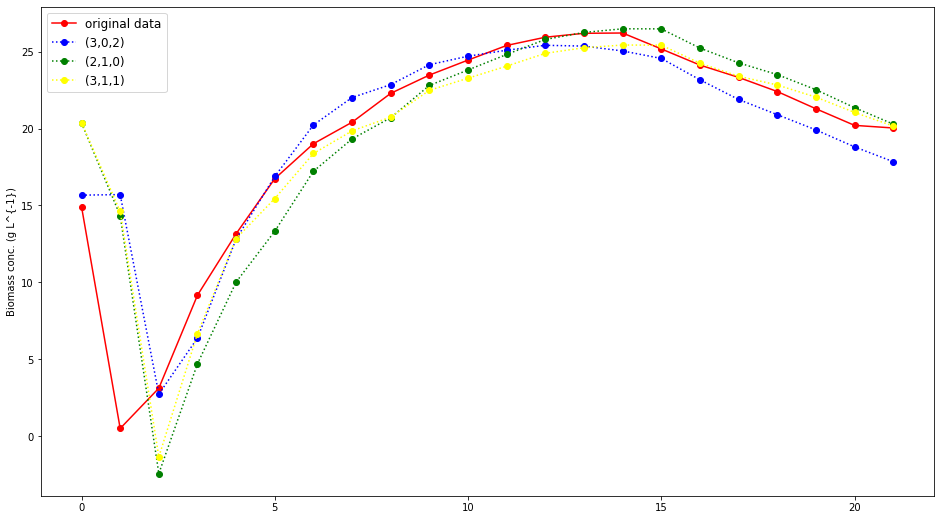

In [42]:
multi_model_chart2(7)

Test MSE (3,0,2): 19.426
Test MSE (2,1,0): 25.723
Test MSE (3,1,1): 22.610


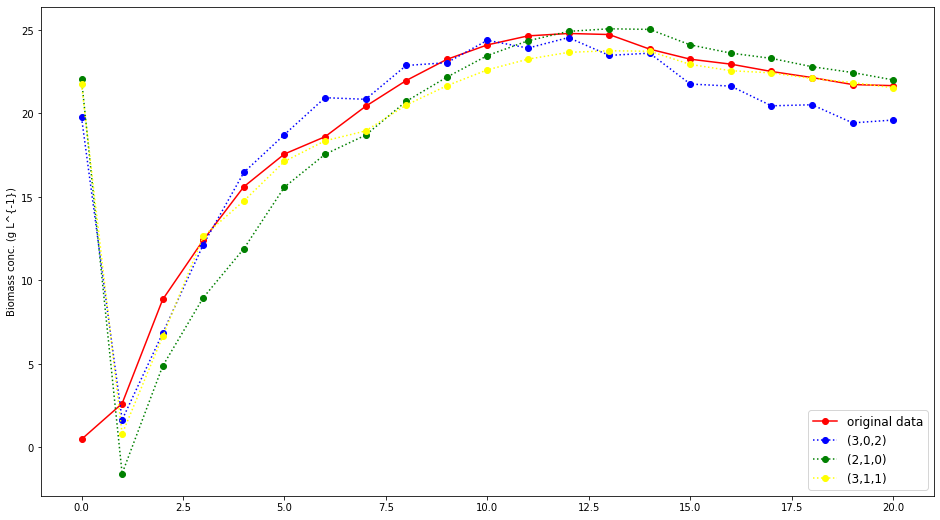

In [35]:
multi_model_chart2(11)

Test MSE (3,0,2): 20.248
Test MSE (2,1,0): 19.718
Test MSE (3,1,1): 17.364


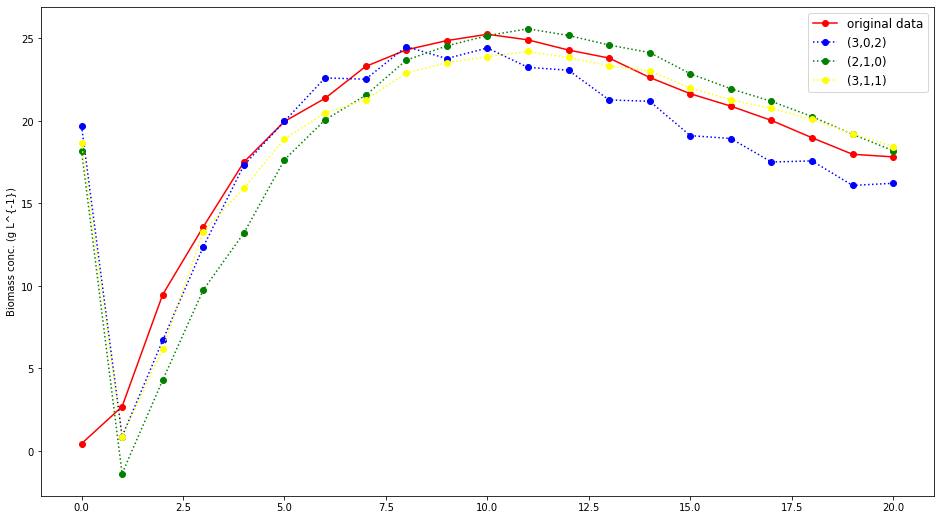

In [36]:
multi_model_chart2(15)

# Závěr

Byl vytvořen model a predikce z dat z jednotlivých vsádek, bohužel kvůli rozsahu vstupních dat nebylo možné pro jednotlivé parametry nastavovat všechny tři parametry ARIMA modelu. 

Po zkombinování dat dohromady bylo možné optimalizovat všechny parametry ARIMA modelu. Vybrané nastavení parametrů (3,1,1) přiblížilo průběh predikce reálným hodnotám zejména při zalamování exponenciální fáze kultivace do fáze stacionární. 

Nicméně další hodnocení s konzistentními daty by bylo potřeba. 